In [1]:
import scanpy as sc
import os
fig_dir = "/lustre/groups/ml01/workspace/ot_perturbation/figures/zebrafish/data"

/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/optuna/study/_optimize.py:29: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from optuna import progress_bar as pbar_module


In [2]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/zebrafish_processed_with_umap.h5ad")

In [5]:
timepoint_color_dict = {"18": "#F8F1DD", "24": "#E6C97C", "36": "#AD8600", "48": "#5D4805", "72": "#1C1605"}
adata.obs["timepoint_as_string"] = adata.obs["timepoint"].astype(int).astype(str)

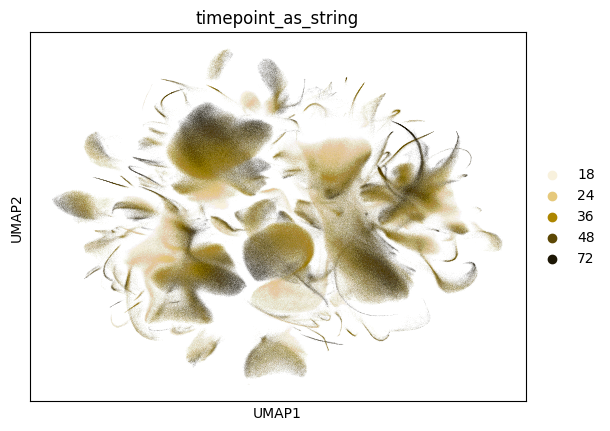

In [6]:
fig = sc.pl.umap(adata, color="timepoint_as_string", return_fig=True, palette=timepoint_color_dict)

In [7]:
fig.savefig(os.path.join(fig_dir, "umap_temporal_new_coloring.png"), dpi=300)

In [8]:
adata.obs.head()

,cell,Size_Factor,n.umi,perc_mitochondrial_umis,timepoint,Oligo,hash_umis,top_to_second_best_ratio,cell_type_sub,cell_type_broad,...,log.hash_umis,gene1+gene2,gene_target_1,gene_target_2,condition,is_control,first_t_control,logtime,germ_layer_adapted,timepoint_as_string
A03_B01_P01-A01_LIG104,A03_B01_P01-A01_LIG104,0.766072,348.0,4.022989,18.0,18h_ctrl-inj_P13_H1,29.0,25.803177,head mesenchyme/PA cartilage,head mesenchyme/PA cartilage,...,NaN,control+negative,control,control,control_control_18,True,True,2.890372,mesoderm_neural_crest,18
A03_B01_P01-A02_LIG101,A03_B01_P01-A02_LIG101,1.001617,455.0,9.010989,72.0,72h_ctrl-inj_P10_A6,46.0,5.384193,intestine (mid),intestine,...,NaN,control+negative,control,control,control_control_72,True,False,4.276666,endoderm,72
A03_B01_P01-A02_LIG127,A03_B01_P01-A02_LIG127,2.007637,912.0,1.644737,36.0,36h_ctrl-inj_P7_A8,15.0,9.082616,basal cell (early),basal cell,...,NaN,control+negative,control,control,control_control_36,True,False,3.583519,ectoderm_neural_crest,36
A03_B01_P01-A02_LIG257,A03_B01_P01-A02_LIG257,0.468889,213.0,0.938967,18.0,18h_ctrl-noto_P3_D7,24.0,21.347128,neural progenitor (hindbrain R7/8),neural progenitor (hindbrain R7/8),...,NaN,control+negative,control,control,control_control_18,True,True,2.890372,ectoderm_neural_crest,18
A03_B01_P01-A03_LIG201,A03_B01_P01-A03_LIG201,0.537131,244.0,0.409836,48.0,48h_ctrl-noto_P16_H9,10.0,6.059433,"neurons (differentiating, contains peripheral)","neurons (differentiating, contains peripheral)",...,NaN,control+negative,control,control,control_control_48,True,False,3.871201,ectoderm_neural_crest,48


In [17]:
ecto = ["ectoderm", 'neural crest', 'ectoderm/neural crest', 'Neural Crest', ]
endo = ["endoderm", ]
meso = ["mesoderm", 'mesoderm/neural crest', 'mesoderm/ectoderm']

def adapt_germ_layer(x):
    if x["germ_layer"] in ecto:
        return "ectoderm"
    if x["germ_layer"] in endo:
        return "endoderm"
    if x["germ_layer"] in meso:
        return "mesoderm"
    raise ValueError(x["germ_layer"])
    
adata.obs["germ_layer_adapted"] = adata.obs.apply(adapt_germ_layer, axis=1)

In [18]:
germ_layer_dict= {"mesoderm": "#77ACA2", "endoderm": "#C9D4C4", "ectoderm": "#F4E9CD"}

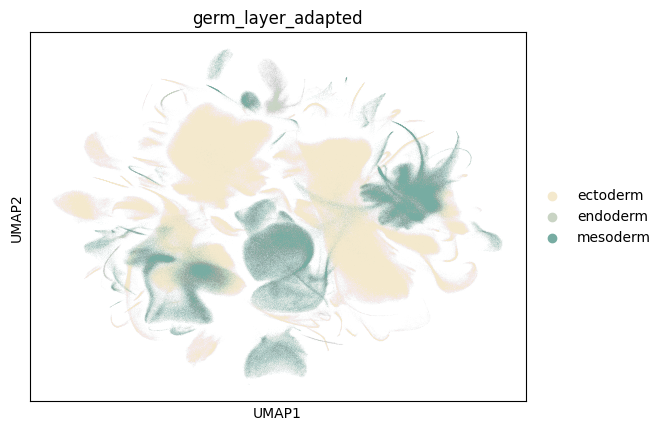

In [19]:
fig = sc.pl.umap(adata, color="germ_layer_adapted", return_fig=True, palette=germ_layer_dict)

In [20]:
fig.savefig(os.path.join(fig_dir, "umap_germ_layer_new_coloring.png"), dpi=300)

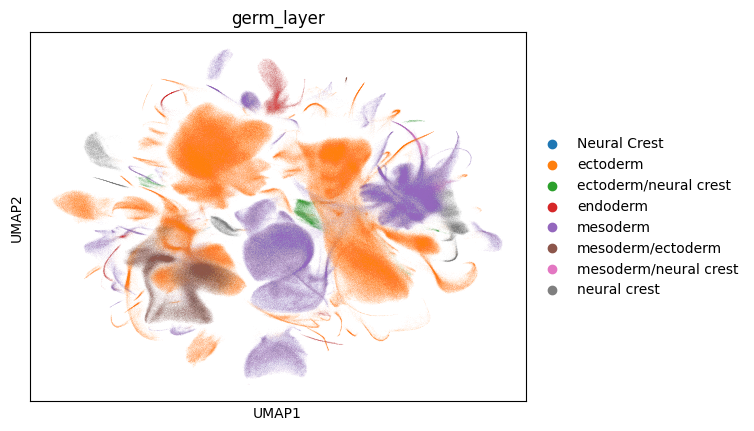

In [21]:
fig = sc.pl.umap(adata, color="germ_layer", return_fig=True)